# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [1]:
# Import libraries that will be used, and set aliases.

import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import dataframe using pandas, view first 5 entries

df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.tail() # Out of curiosity look at last 5 as well.

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
df.info() # Use .info to view the total entries per column and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [5]:
df.describe() # Run some basic statistics on dataframe

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [6]:
df['crim'].quantile(.1) # Crime rate per capita of the bottom 10% towns

0.035901999999999996

In [7]:
df['nox'].sum() # Total amount of nitrogen oxide concentration in parts per 10 million

185.529

In [8]:
df['age'].value_counts().head(10).sort_values(ascending=False) # Proportion of zones with houses built
                                                               # before 1940

100.0    26
96.0      4
95.6      3
98.8      3
21.4      3
97.3      3
95.4      3
76.5      3
18.4      2
86.5      2
Name: age, dtype: int64

In [9]:
df['ptratio'].var() # Variance of the pupil to teacher ratio across towns

4.630335033828984

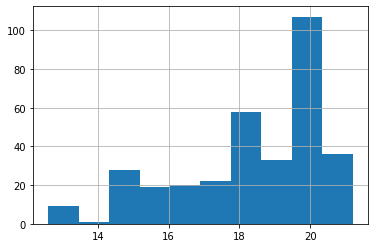

In [10]:
df['ptratio'].hist();

In [11]:
df['zn'].value_counts() # Shows that most zones have less than 25,000 of residential land

0.0      248
20.0      14
25.0       7
80.0       7
22.0       7
12.5       6
45.0       5
30.0       3
90.0       3
95.0       3
60.0       3
33.0       3
55.0       3
75.0       3
34.0       3
21.0       3
40.0       2
28.0       2
85.0       2
35.0       1
100.0      1
17.5       1
82.5       1
52.5       1
18.0       1
Name: zn, dtype: int64

In [12]:
df.loc[df['crim'] > .15, 'safety'] = 'be cautious' # Make a new column based on crime rate
df.loc[df['crim'] < .15, 'safety'] = 'safer'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 16 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
safety     333 non-null object
dtypes: float64(11), int64(4), object(1)
memory usage: 41.8+ KB


In [14]:
df['safety'].value_counts() # Ratio of towns with more and less that 15% crime rate per capita

be cautious    201
safer          132
Name: safety, dtype: int64

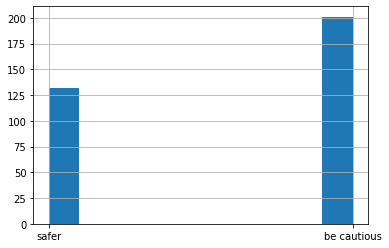

In [15]:
df['safety'].hist()

In [18]:
df.loc[df['nox'] > .453, 'air quality'] = 'poor air' # Make a new column based on factor of air quality
df.loc[df['nox'] < .453, 'air quality'] = 'better air'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 17 columns):
ID             333 non-null int64
crim           333 non-null float64
zn             333 non-null float64
indus          333 non-null float64
chas           333 non-null int64
nox            333 non-null float64
rm             333 non-null float64
age            333 non-null float64
dis            333 non-null float64
rad            333 non-null int64
tax            333 non-null int64
ptratio        333 non-null float64
b              333 non-null float64
lstat          333 non-null float64
medv           333 non-null float64
safety         333 non-null object
air quality    329 non-null object
dtypes: float64(11), int64(4), object(2)
memory usage: 44.4+ KB


In [20]:
df['air quality'].value_counts() # Get ratio of zones with better and worse air quality

poor air      249
better air     80
Name: air quality, dtype: int64

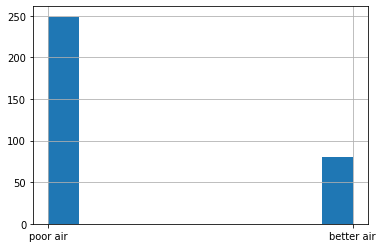

In [21]:
df['air quality'].hist()

In [22]:
# Find those zones with low crime and high air quality
df.loc[(df['safety'] == 'safer') & (df['air quality'] == 'better air')] 

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,safety,air quality
22,40,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8,safer,better air
23,41,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9,safer,better air
24,43,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3,safer,better air
26,45,0.12269,0.0,6.91,0,0.448,6.069,40.0,5.7209,3,233,17.9,389.39,9.55,21.2,safer,better air
31,51,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7,safer,better air
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,342,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7,safer,better air
230,348,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36,23.1,safer,better air
231,349,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,safer,better air
232,350,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89,26.6,safer,better air


In [23]:
# Get the number of zones with high air quality and low crime rate
nice_place = df.loc[(df['safety'] == 'safer') & (df['air quality'] == 'better air')]
len(nice_place)

67

In [24]:
# Declare style of matplotlib, I like seaborn
plt.style.use('seaborn')

In [25]:
# Make new dataframe based on crime rate and price values
value_df = df[['crim', 'medv', 'tax']].copy()
value_df.head()

,crim,medv,tax
0,0.00632,24.0,296
1,0.02731,21.6,242
2,0.03237,33.4,222
3,0.06905,36.2,222
4,0.08829,22.9,311


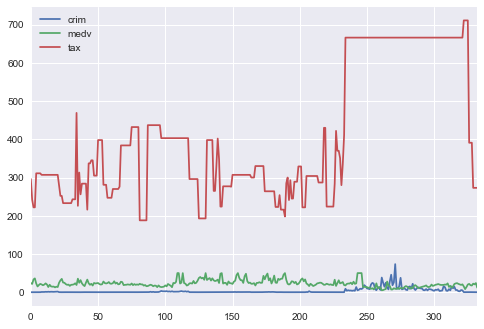

In [26]:
# Run basic plot on new dataframe
value_df.plot()

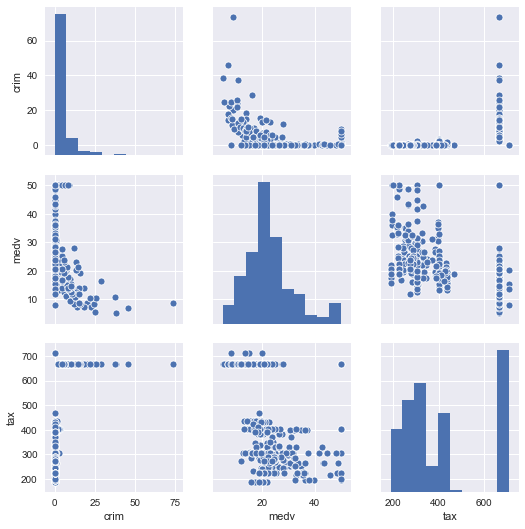

In [27]:
sns.pairplot(value_df)

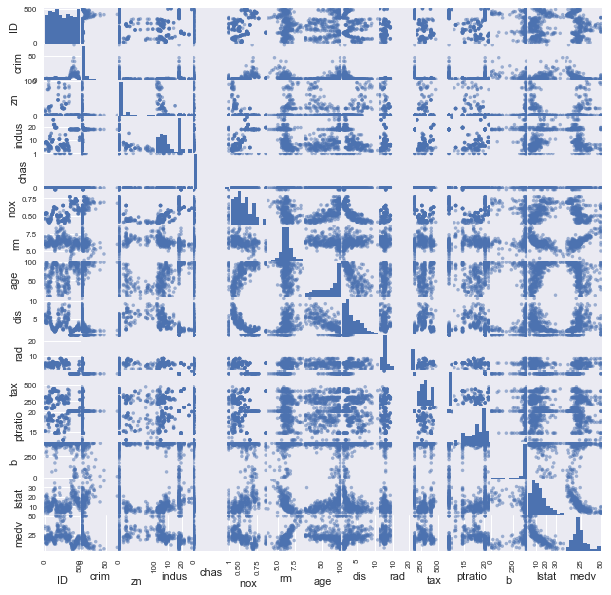

In [28]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!